In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
df=pd.read_csv('credit_card_churn.csv')

In [33]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [34]:
df=df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis='columns')

In [35]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis='columns',inplace=True)

In [36]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [37]:
df=df.drop('CLIENTNUM',axis='columns')

In [38]:
df.isna().values.any()

False

In [39]:
df.duplicated().sum()

0

In [40]:
df_better=pd.get_dummies(df,columns=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'],drop_first=True)

In [41]:
df_better.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_Existing Customer', 'Gender_M',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

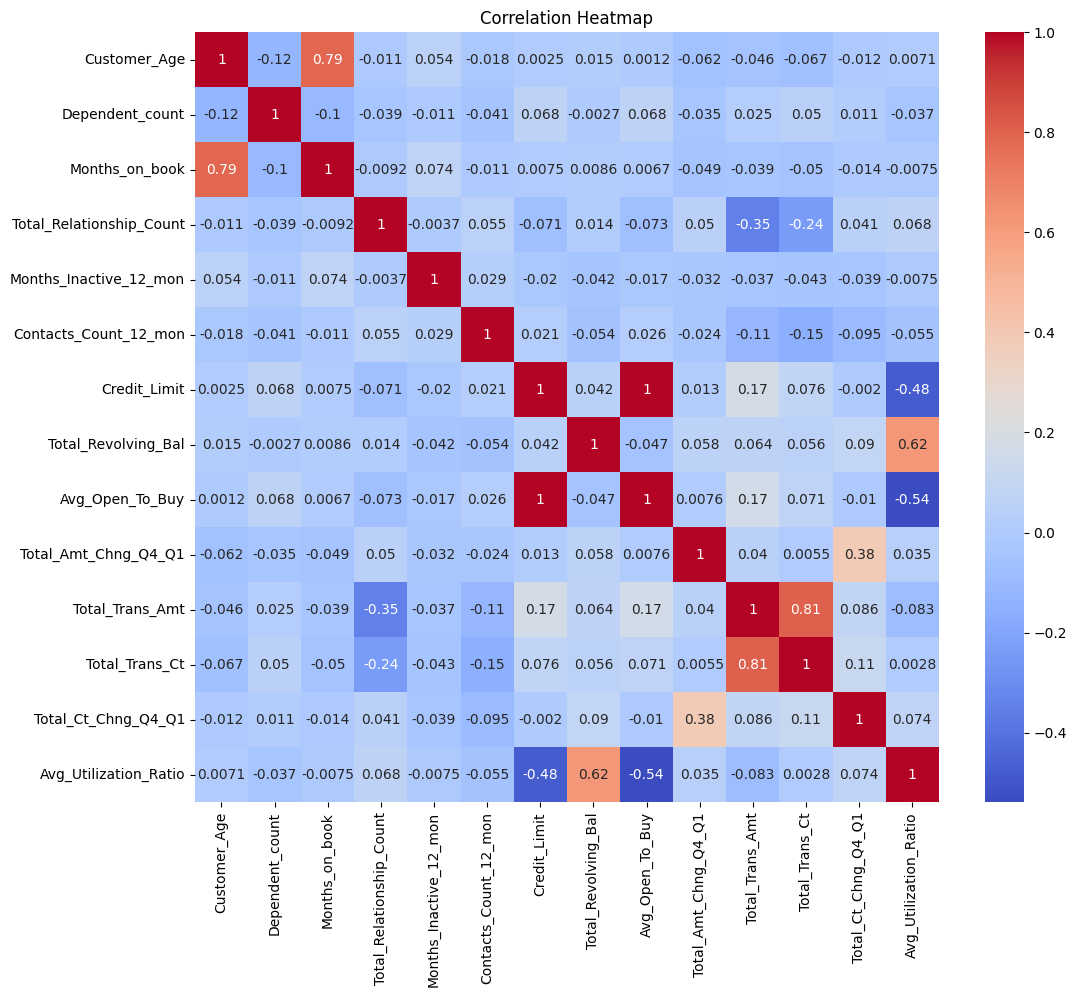

In [42]:
# Data Visualization
# Correlation heatmap
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

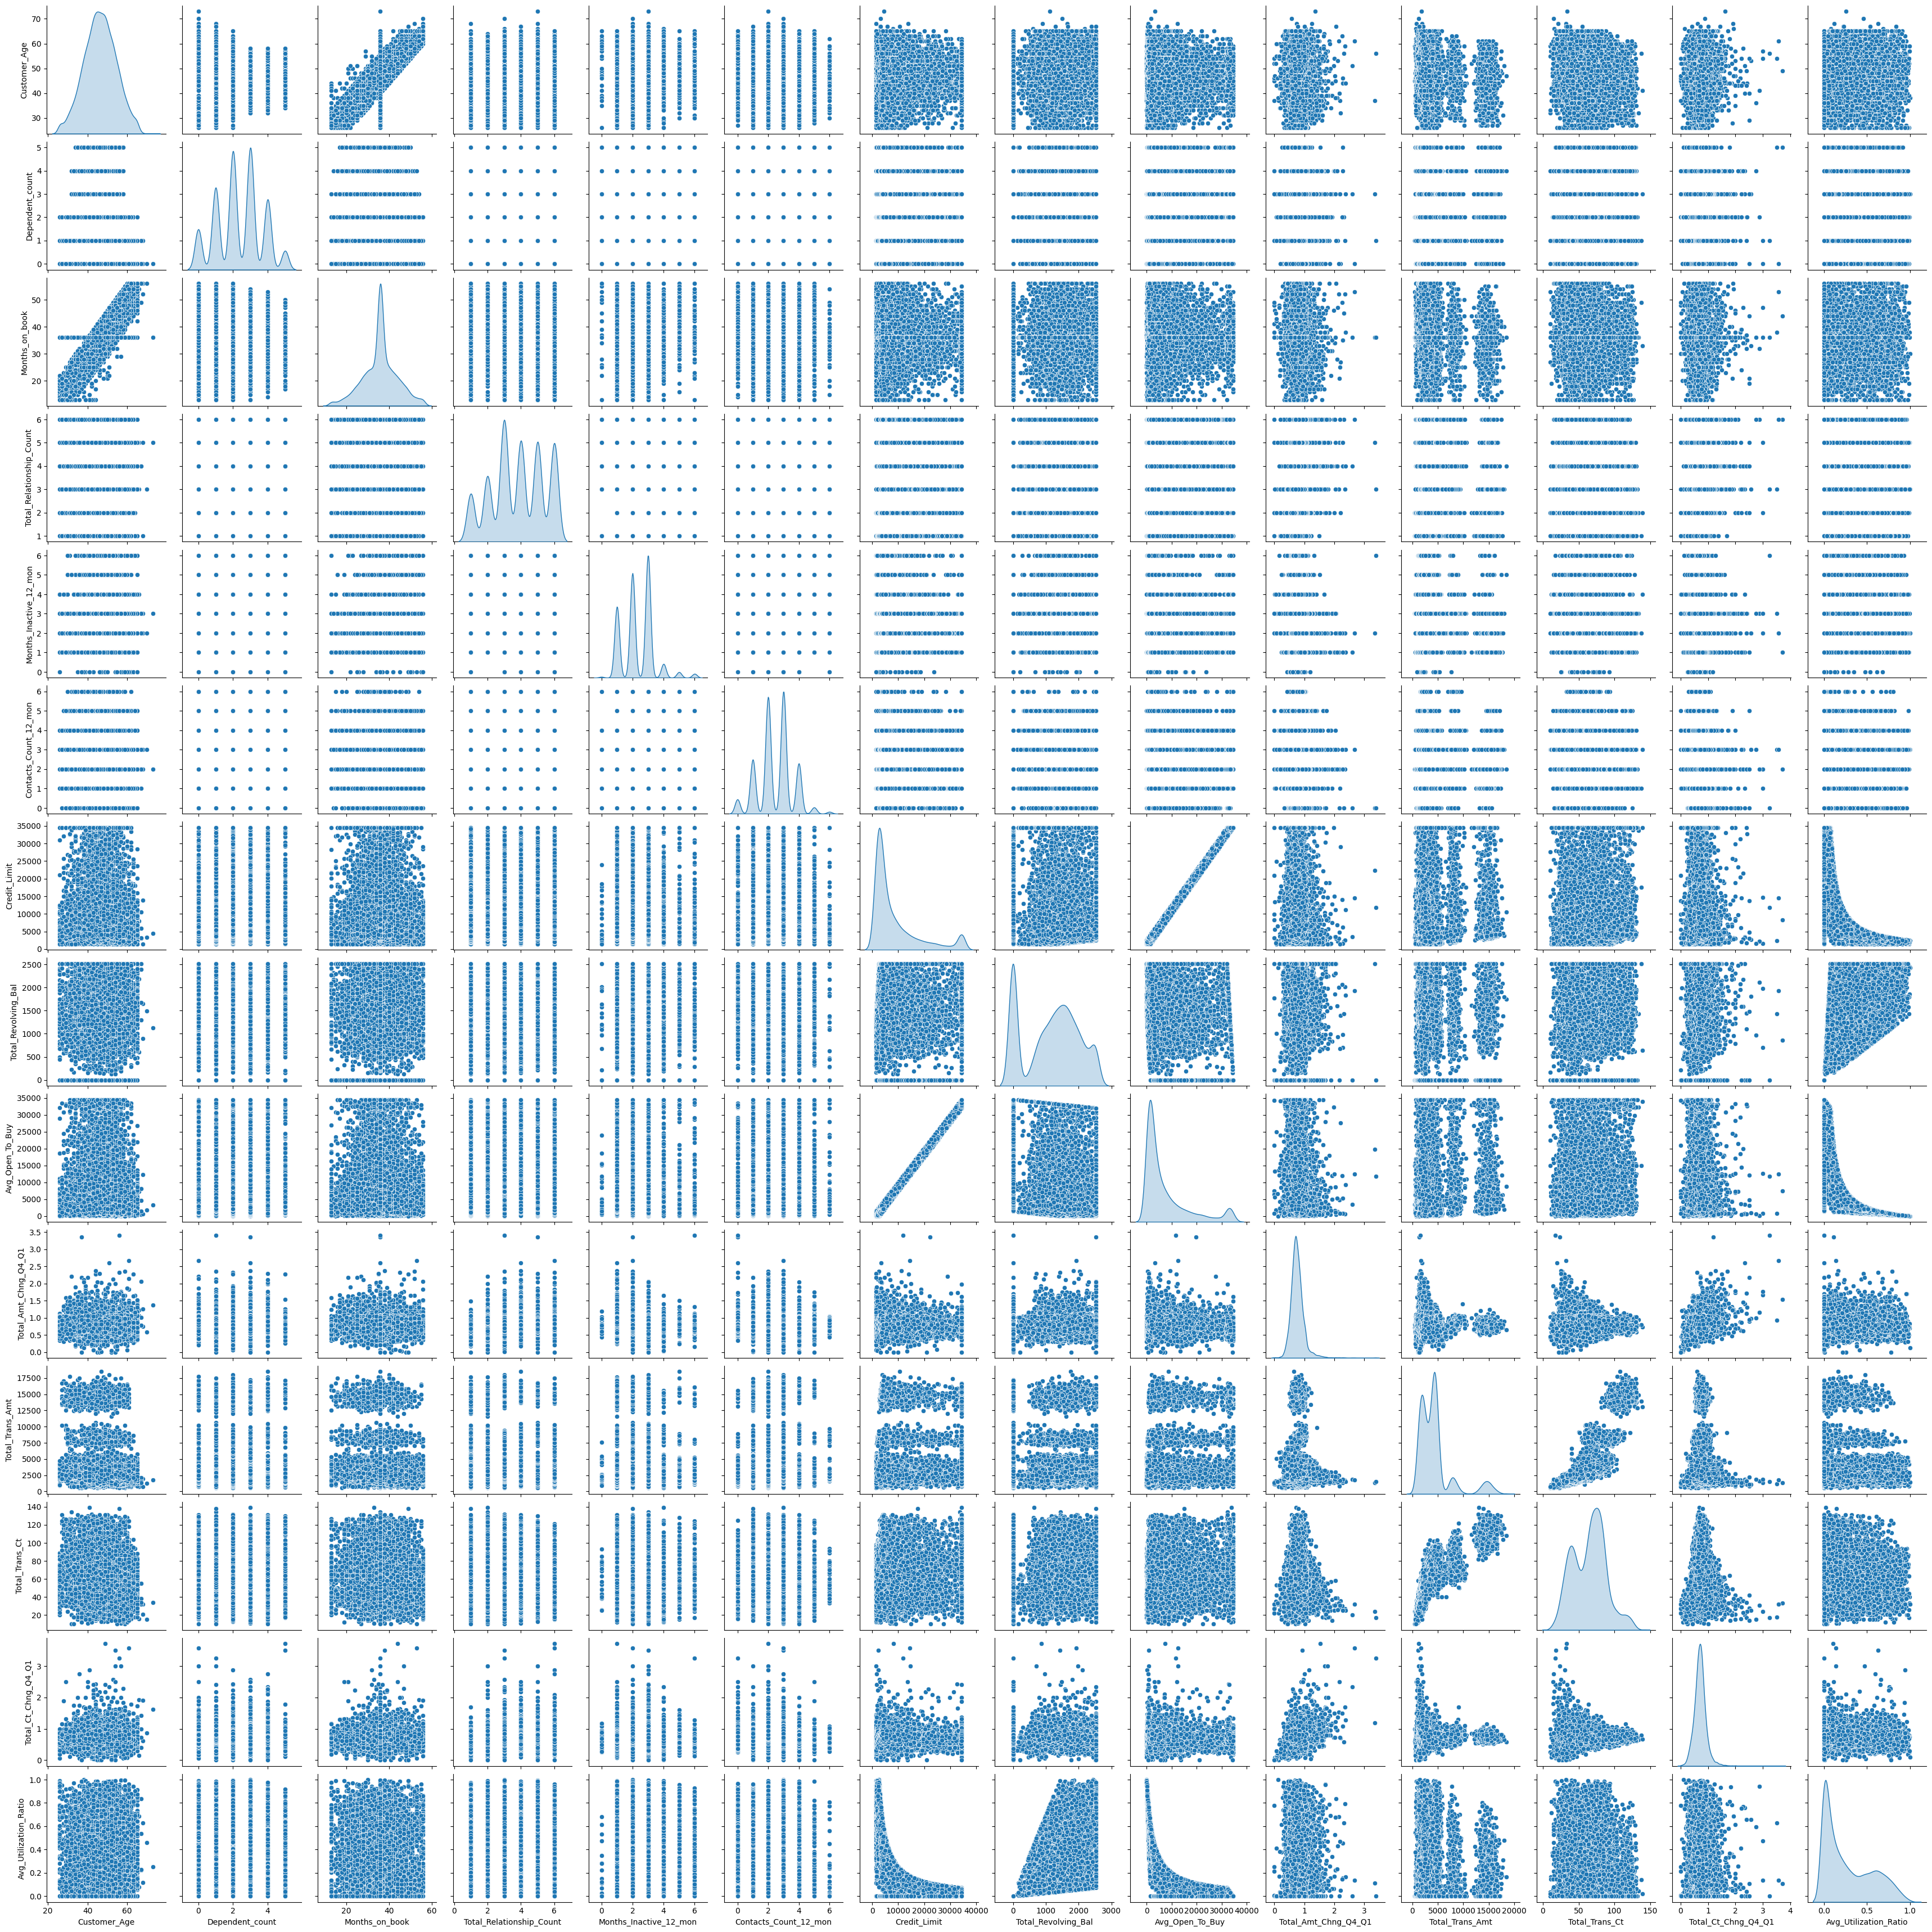

In [43]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()


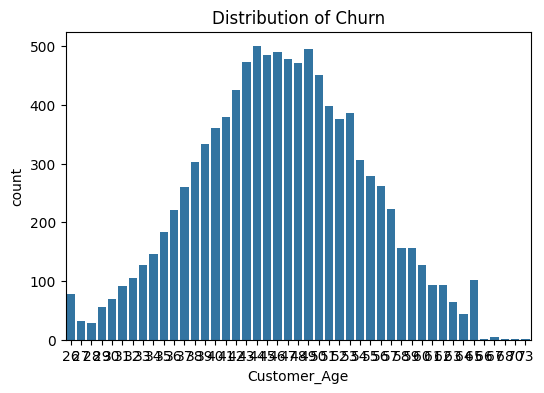

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer_Age', data=df)
plt.title('Distribution of Churn')
plt.show()

In [45]:
df_better['Attrition_Flag_Existing Customer'].value_counts()

Attrition_Flag_Existing Customer
True     8500
False    1627
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
scaler=StandardScaler()

In [48]:
X=df_better.drop(['Attrition_Flag_Existing Customer'],axis='columns')
y=df_better['Attrition_Flag_Existing Customer']

In [49]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: Attrition_Flag_Existing Customer, dtype: bool

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,train_size=0.8,test_size=0.2)

In [51]:
X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

(8101, 32)

In [52]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [53]:
X_train_scaled

array([[-0.65969094,  0.50072266, -0.23440272, ..., -0.10717778,
        -0.04448565, -0.23849933],
       [ 0.21272264,  1.27321443,  0.26438805, ..., -0.10717778,
        -0.04448565, -0.23849933],
       [ 1.70828877, -0.27176911,  2.25955113, ..., -0.10717778,
        -0.04448565, -0.23849933],
       ...,
       [-0.53506043,  1.27321443, -0.35910042, ..., -0.10717778,
        -0.04448565, -0.23849933],
       [ 0.08809213, -1.04426088,  0.26438805, ..., -0.10717778,
        -0.04448565,  4.19288388],
       [ 1.45902775, -1.04426088,  2.01015575, ..., -0.10717778,
        -0.04448565, -0.23849933]])

In [54]:
import tensorflow as tf


In [55]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model=Sequential()
model.add(Dense(16,activation='relu',input_dim=32))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [59]:
hist =model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5482 - loss: 0.6623 - val_accuracy: 0.8334 - val_loss: 0.4394
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8419 - loss: 0.4023 - val_accuracy: 0.8507 - val_loss: 0.3441
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.8661 - loss: 0.3374 - val_accuracy: 0.8933 - val_loss: 0.3002
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8943 - loss: 0.2925 - val_accuracy: 0.8994 - val_loss: 0.2783
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9030 - loss: 0.2696 - val_accuracy: 0.9025 - val_loss: 0.2660
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9117 - loss: 0.2496 - val_accuracy: 0.9038 - val_loss: 0.2579
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.9110 - loss: 0.2477 - val_accuracy: 0.9075 - val_loss: 0.2497
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9115 - loss: 0.2356 - va

In [60]:
y_log=model.predict(X_test_scaled)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step


In [61]:

y_pred=np.where(y_log>0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9052319842053307